# Plotting results



In [9]:
# Hello Max!

import numpy as np
import networkx as nx
from agent import Agent
from model import Model
from hybrid_networks import create_hybrid_network
from tqdm import tqdm
from hybrid_networks_clean import rewire_network, randomize_network_v2, create_hybrid_network


%load_ext autoreload
%autoreload 2                      

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#import opinionated
import matplotlib.pyplot as plt
plt.style.use("opinionated_rc")
import colormaps as cmaps 

In [3]:
#!pip install pygam

In [4]:
import pandas as pd
from pygam import LogisticGAM,LinearGAM, s   
from sklearn.model_selection import train_test_split

In [5]:
data_df = pd.read_csv('bayesagent_perceptron_results_df.csv')

In [25]:
import dill

# Use dill to deserialize the graph from a file
with open('data_proc/perceptron_graph_pre_1979.pkl', 'rb') as f:
    G_perceptron = dill.load(f)


In [18]:
randomize_by = [0,.2,.4,.6,.8,1.]

In [19]:

import graph_tool.all as gt



G_perceptron = randomize_network_v2(G_perceptron, p_rewiring=.9)
# Convert NetworkX graph to graph_tool graph
g = gt.Graph(directed=True)

# Create a mapping from NetworkX nodes to graph_tool vertices
node_map = {n: g.add_vertex() for n in G_perceptron.nodes()}

# Add edges to the graph_tool graph
for u, v in G_perceptron.edges():
    g.add_edge(node_map[u], node_map[v])
    
    
pos = gt.sfdp_layout(g)
dprms = dict(fmt="png",  output_size=(1200, 1200))
gt.graph_draw(output = "", g, pos, **dprms)


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


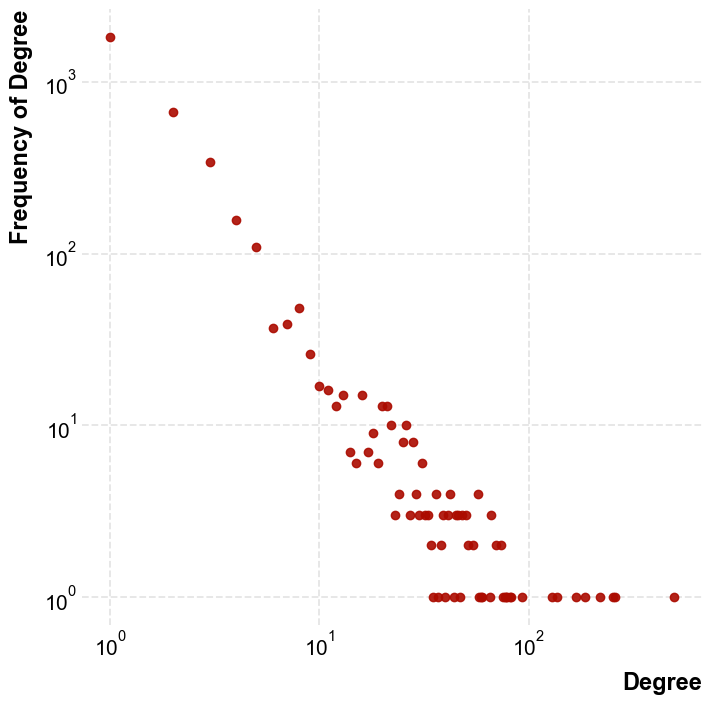

In [39]:
import powerlaw


def plot_loglog(G,m=0):
    degree_freq = nx.degree_histogram(G)
    degrees = range(len(degree_freq))
    plt.figure(figsize=(8, 8))
    plt.loglog(degrees, degree_freq,'o', c='#ab0b00',alpha=.9)
    plt.xlabel('Degree')
    plt.ylabel('Frequency of Degree')
    results = powerlaw.Fit(degrees)
    print(results)

    
plot_loglog(G_perceptron,m=1)

In [4]:
#!conda install -c conda-forge scikit-sparse nose -y

In [69]:

data_df['converged'] = data_df['convergence_step']< 10000
print('N. unconverged simulations: ', np.sum(~ data_df['converged']))
data_df['share_of_correct_agents_at_conv'] = data_df['true_consensus']
data_df

N. unconverged simulations:  2


,n_agents,p_rewiring,uncertainty,n_experiments,rewiring_type,mean_degree,true_consensus,convergence_step,agent_type,converged,share_correct_at_convergence,avg_estimate_of_correct_agents_at_conv,avg_credence_of_correct_agents_at_conv,share_of_correct_agents_at_conv
0,3519,0.441173,0.016661,7427,randomize,4.346689,0.773231,6,bayes,True,0.773231,0.773231,0.773231,0.773231
1,3519,0.817119,0.009739,1912,randomize,4.346121,0.897698,28,bayes,True,0.897698,0.897698,0.897698,0.897698
2,3519,0.798491,0.022603,5749,randomize,4.346689,0.903666,7,bayes,True,0.903666,0.903666,0.903666,0.903666
3,3519,0.384941,0.003522,5838,randomize,4.345553,0.705030,55,bayes,True,0.705030,0.705030,0.705030,0.705030
4,3519,0.404991,0.024896,5526,randomize,4.346689,0.780619,6,bayes,True,0.780619,0.780619,0.780619,0.780619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3519,0.583912,0.021065,4549,randomize,4.346121,0.849957,7,bayes,True,0.849957,0.849957,0.849957,0.849957
1996,3519,0.188740,0.007631,7496,randomize,4.346121,0.619494,14,bayes,True,0.619494,0.619494,0.619494,0.619494
1997,3519,0.847185,0.002986,757,randomize,4.346121,0.874680,526,bayes,True,0.874680,0.874680,0.874680,0.874680
1998,3519,0.145805,0.015593,352,randomize,4.346689,0.557829,50,bayes,True,0.557829,0.557829,0.557829,0.557829


<Axes: xlabel='convergence_step', ylabel='Count'>

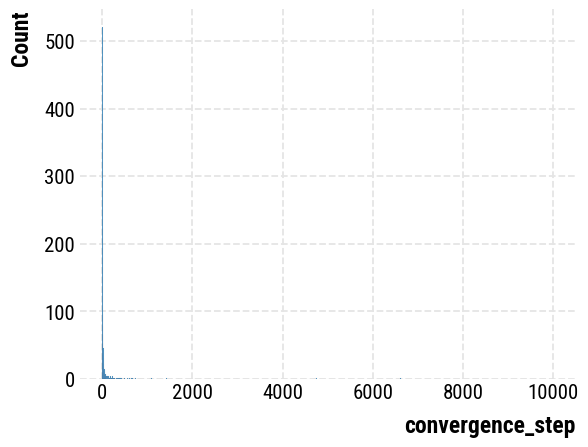

In [64]:
import seaborn as sns

sns.histplot(data_df['convergence_step'])

In [65]:
"true_consensus", "choice_consensus" and "convergence_step"

('true_consensus', 'convergence_step')

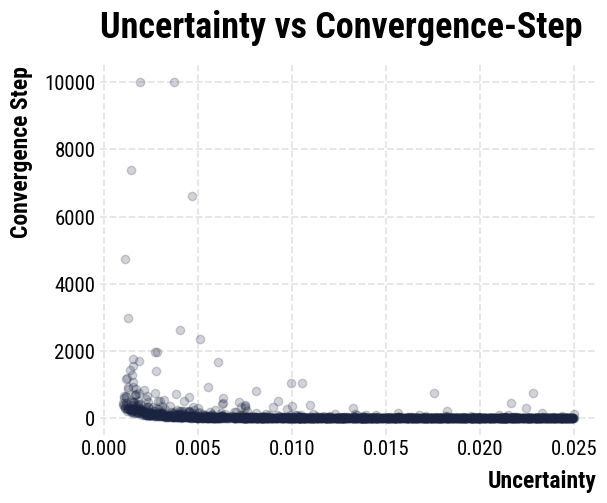

In [66]:
# Creating the scatter plot
plt.scatter(data_df['uncertainty'], data_df['convergence_step'], c='#1a2340',alpha=.2)

# Adding labels and title
plt.xlabel('Uncertainty')  # X-axis label
plt.ylabel('Convergence Step')  # Y-axis label
plt.title('Uncertainty vs Convergence-Step')  # Title of the plot

# Show the plot
plt.show()

## Predicting 'share_correct_at_convergence'


In [67]:

 
    # Preparing the data
X = data_df[['p_rewiring',	'uncertainty',	'n_experiments'	]]
y = data_df['share_of_correct_agents_at_conv']

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_33315/2505495427.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns=rename_dict, inplace=True)


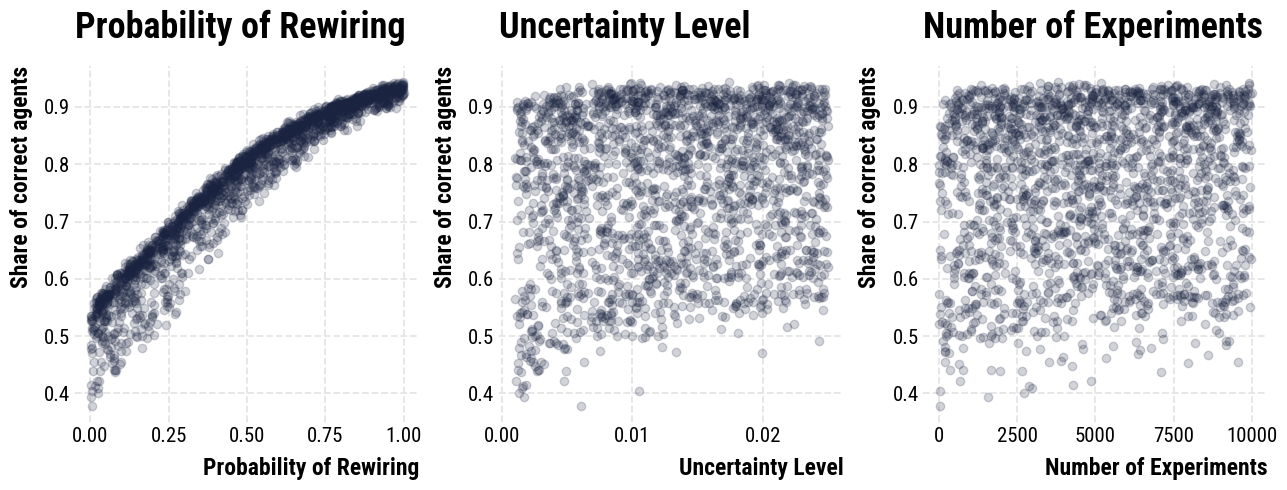

In [71]:
rename_dict = {
    'n_agents': 'Number of Agents',
    'p_rewiring': 'Probability of Rewiring',
    'uncertainty': 'Uncertainty Level',
    'n_experiments': 'Number of Experiments',
    'share_of_correct_agents_at_conv': 'Share of correct agents'
}

# Renaming columns in X for better readability
X.rename(columns=rename_dict, inplace=True)


# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))  # Adjust the size as needed
axes = axes.ravel()

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], y, c='#1a2340', alpha=.2)
    axes[i].set_xlabel(rename_dict.get(col, col))  # Use renamed label
    axes[i].set_ylabel(rename_dict['share_of_correct_agents_at_conv'])
    axes[i].set_title(f'{rename_dict.get(col, col)}')

plt.tight_layout()
plt.show()

In [73]:


# Splitting the data into training and testing sets for model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the Logistic GAM model
gam = LinearGAM(s(0,n_splines=6) + s(1,n_splines=6) + s(2,n_splines=6)  ).fit(X_train, y_train)

# print(f"Accuracy on training data: {gam.accuracy(X_train, y_train)}")
# print(f"Accuracy on test data: {gam.accuracy(X_test, y_test)}")
print(gam.summary())

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     10.9663
Link Function:                     IdentityLink Log Likelihood:                              -2646344.7119
Number of Samples:                         1400 AIC:                                          5292713.3564
                                                AICc:                                         5292713.5801
                                                GCV:                                                0.0003
                                                Scale:                                              0.0003
                                                Pseudo R-Squared:                                   0.9856
Feature Function                  Lam

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_33315/3553637546.py:9: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


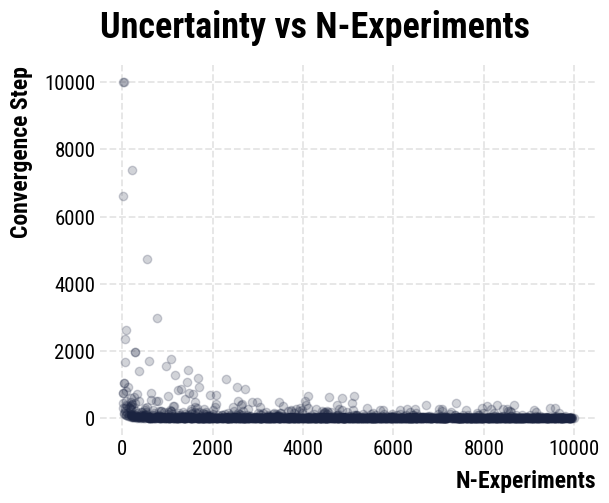

In [17]:
# Creating the scatter plot
plt.scatter(data_df['n_experiments'], data_df['convergence_step'], c='#1a2340',alpha=.2)

# Adding labels and title
plt.xlabel('N-Experiments')  # X-axis label
plt.ylabel('Convergence Step')  # Y-axis label
plt.title('Uncertainty vs N-Experiments')  # Title of the plot

# Show the plot
plt.show()

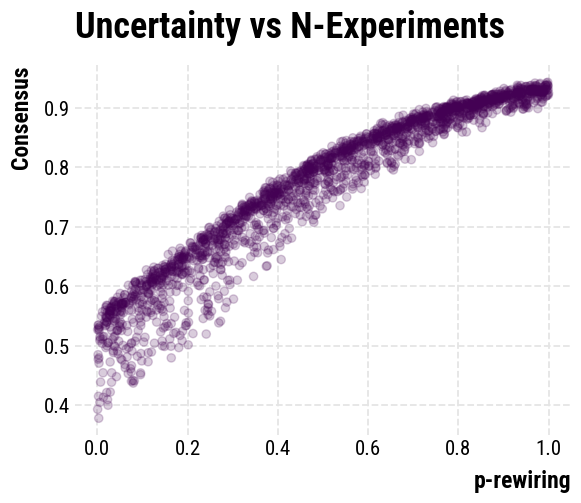

In [20]:
# Creating the scatter plot
plt.scatter(data_df['p_rewiring'], data_df['share_correct_at_convergence'], c=pd.factorize(data_df['rewiring_type'])[0],alpha=.2)

# Adding labels and title
plt.xlabel('p-rewiring')  # X-axis label
plt.ylabel('Consensus')  # Y-axis label
plt.title('Uncertainty vs N-Experiments')  # Title of the plot

# Show the plot
plt.show()

In [ ]:
# Creating the scatter plot
plt.scatter(data_df['p_rewiring'], data_df['true_consensus'], c=pd.factorize(data_df['rewiring_type'])[0],alpha=.2)

# Adding labels and title
plt.xlabel('p-rewiring')  # X-axis label
plt.ylabel('Consensus')  # Y-axis label
plt.title('Uncertainty vs N-Experiments')  # Title of the plot

# Show the plot
plt.show()

# Beta-Agent

In [44]:
data_df = pd.read_csv('betaagent_results_df.csv')

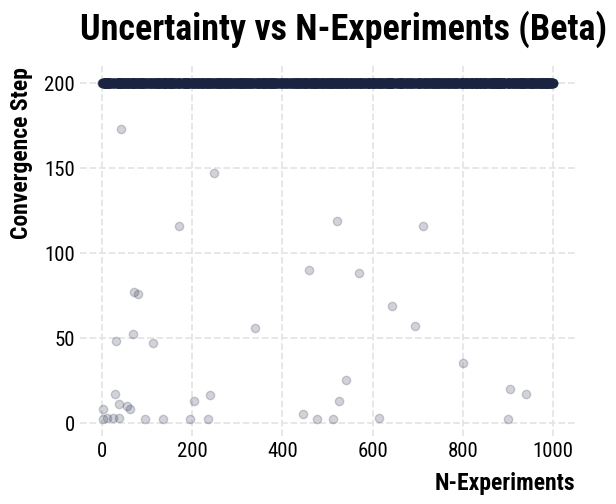

In [47]:
# Creating the scatter plot
plt.scatter(data_df['n_experiments'], data_df['convergence_step'], c='#1a2340',alpha=.2)

# Adding labels and title
plt.xlabel('N-Experiments')  # X-axis label
plt.ylabel('Convergence Step')  # Y-axis label
plt.title('Uncertainty vs N-Experiments (Beta)')  # Title of the plot

# Show the plot
plt.show()

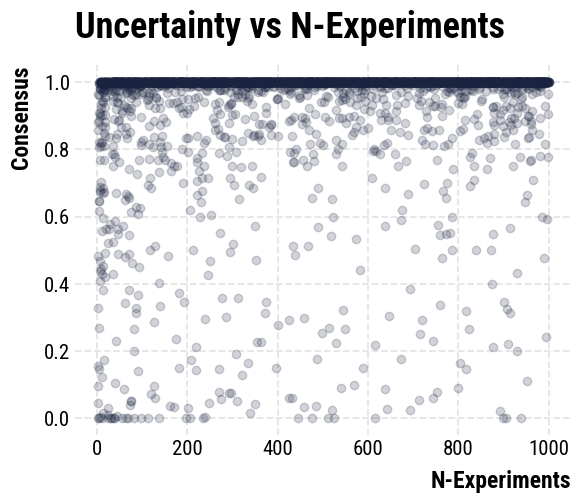

In [46]:
# Creating the scatter plot
plt.scatter(data_df['n_experiments'], data_df['true_consensus'], c='#1a2340',alpha=.2)

# Adding labels and title
plt.xlabel('N-Experiments')  # X-axis label
plt.ylabel('Consensus')  # Y-axis label
plt.title('Uncertainty vs N-Experiments')  # Title of the plot

# Show the plot
plt.show()

In [41]:
!pip install pymc

  Using cached pymc-5.15.1-py3-none-any.whl.metadata (10 kB)
  Using cached arviz-0.18.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached cachetools-5.3.3-py3-none-any.whl.metadata (5.3 kB)
  Using cached pytensor-2.22.1-cp312-cp312-macosx_11_0_arm64.whl
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached dm_tree-0.1.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (1.9 kB)
  Using cached h5netcdf-1.3.0-py3-none-any.whl.metadata (13 kB)
  Using cached xarray_einstats-0.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached etuples-0.3.9-py3-none-any.whl
  Using cached logical_unification-0.4.6-py3-none-any.whl
  Using cached miniKanren-1.0.3-py3-none-any.whl
  Using cached cons-0.4.6-py3-none-any.whl
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached h5py-3.11.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached pymc-5.15.1-py3-none-any.whl (484 kB)
Using c

In [ ]:
# check powerlaw.

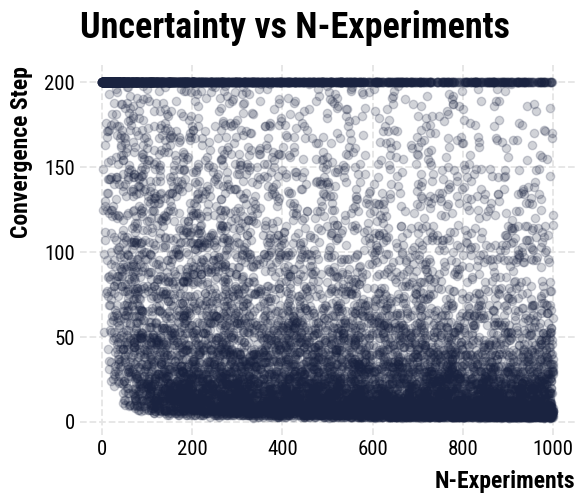

In [38]:
data_df = pd.read_csv('bayesagent_results_df.csv')
# Creating the scatter plot
plt.scatter(data_df['n_experiments'], data_df['convergence_step'], c='#1a2340',alpha=.2)

# Adding labels and title
plt.xlabel('N-Experiments')  # X-axis label
plt.ylabel('Convergence Step')  # Y-axis label
plt.title('Uncertainty vs N-Experiments')  # Title of the plot

# Show the plot
plt.show()

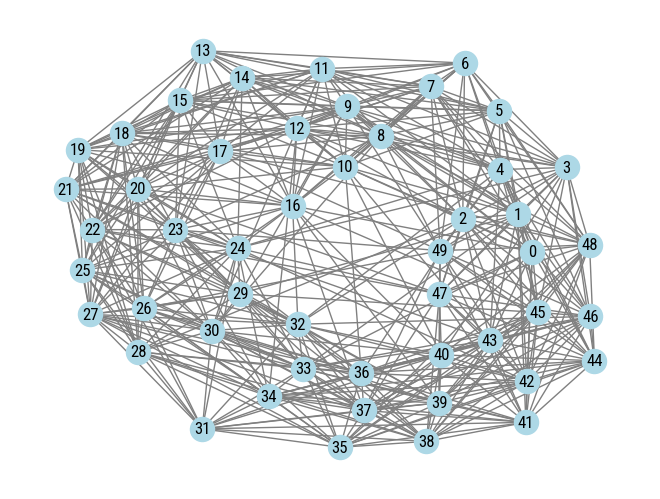

In [365]:
import networkx as nx
import matplotlib.pyplot as plt



# n is the number of nodes
# k is each node is connected to k nearest neighbors in ring topology
# p is the rewiring probability (set to 0 for a regular ring lattice)

n = 50  # number of nodes
k = 2  # each node is connected to 2 nearest neighbors on either side

G = nx.watts_strogatz_graph(n, k, 0.1)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

In [9]:


# Splitting the DataFrame by network type
network_types = results_df['network_type'].unique()

my_gams = {}

for network_type in network_types:
    # Subset the DataFrame by network type
    subset = results_df[results_df['network_type'] == network_type]
    
    # Preparing the data
    X = subset[['n_agents']]
    y = subset['true_consensus'].astype(int)  # Convert boolean to integer
    
    # Splitting the data into training and testing sets for model validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fitting the Logistic GAM model
    gam = LogisticGAM(s(0,n_splines=6)).fit(X_train, y_train)
    
    # Storing the model
    my_gams[network_type] = gam
    
    # Optionally, you can print out model accuracy or other statistics here
    print(f"Model for {network_type}:")
    print(f"Accuracy on training data: {gam.accuracy(X_train, y_train)}")
    print(f"Accuracy on test data: {gam.accuracy(X_test, y_test)}")
    print("-" * 30)


ModuleNotFoundError: No module named 'pygam'

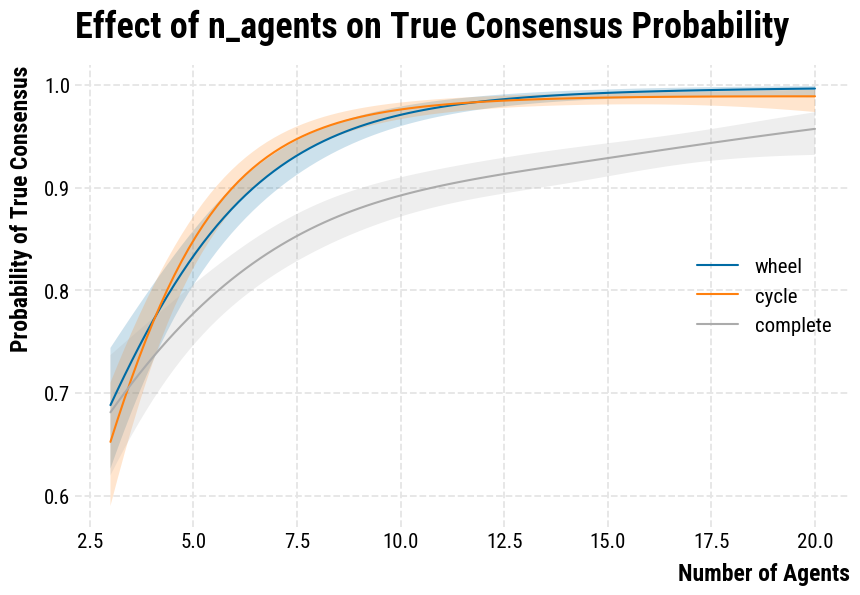

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the size of the figure
plt.figure(figsize=(10, 6))


cmap= cmaps.colorblind_10

X_range = np.linspace(X['n_agents'].min(), X['n_agents'].max(), 100)


colors =[cmap(0), cmap(1/cmap.N), cmap(1/cmap.N*2)]

for i, (network_type, gam) in enumerate(my_gams.items()):
    conf = gam.confidence_intervals(X_range.reshape(-1, 1), width=0.95, quantiles=None)
    plt.fill_between(X_range, conf[:, 0], conf[:, 1], facecolor=colors[i], alpha=0.2, interpolate=True)


for i, (network_type, gam) in enumerate(my_gams.items()):
    # Generating a range of values for n_agents to predict and plot
    
    
    # Predicting with the model
    #y_pred, conf = pdep, confi = model.partial_dependence(term=0, width=.95)
    y_pred = gam.predict_proba(X_range.reshape(-1, 1))

    
    # Plotting predicted probabilities
    plt.plot(X_range, y_pred,c=colors[i], label=f'{network_type}')
    
    # Plotting observed data

    # observed_data = results_df[results_df['network_type'] == network_type]
    # plt.scatter(observed_data['n_agents'] + np.random.rand(len(observed_data)), observed_data['true_consensus'], 
    #             alpha=0.01, c='grey',marker=2)


# Adding title, labels, and legend
plt.title('Effect of n_agents on True Consensus Probability')
plt.xlabel('Number of Agents')
plt.ylabel('Probability of True Consensus')
plt.legend()
plt.show()


9

# Tunable networks

In [ ]:
import random
import networkx as nx



def generate_parameters(n):
    params_list = []
    for _ in range(n):
        n_agents = random.randint(3, 15)
        degree = random.randint(1, n_agents-1)
        p_preferential_attachment = random.uniform(0, 1)
        network = create_hybrid_network(n_agents, degree=degree, p_preferential_attachment=p_preferential_attachment)
        uncertainty = 0.001
        n_experiments = 1000 #random.randint(1, 1000)
        params = {
            "n_agents": n_agents,
            "degree": degree,
            "p_preferential_attachment": p_preferential_attachment,
            "network": network,
            "uncertainty": uncertainty,
            "n_experiments": n_experiments
        }
        params_list.append(params)
    return params_list

# Example usage:
# Generate a list of 5 parameter dictionaries
parameter_dictionaries = generate_parameters(50)


In [ ]:
parameter_dictionaries = generate_parameters(10000)  # Generate parameter dictionaries
results_df = batch_run_simulations(parameter_dictionaries, number_of_steps=100000, show_bar=False)
print(results_df)


Running simulations: 100%|██████████| 10000/10000 [01:15<00:00, 132.10it/s]

      n_agents  degree  p_preferential_attachment  uncertainty  n_experiments  \
0            4       2                   0.492210        0.001           1000   
1           12       7                   0.640592        0.001           1000   
2           13       3                   0.805594        0.001           1000   
3            6       5                   0.253219        0.001           1000   
4           11       5                   0.685990        0.001           1000   
...        ...     ...                        ...          ...            ...   
9995         6       5                   0.865813        0.001           1000   
9996        12       7                   0.784926        0.001           1000   
9997         6       2                   0.177675        0.001           1000   
9998         4       2                   0.691931        0.001           1000   
9999         9       1                   0.986273        0.001           1000   

      true_consensus  true_

In [ ]:
 
    # Preparing the data
X = results_df[['n_agents', 'degree', 'p_preferential_attachment']]
y = results_df['true_consensus'].astype(int)  # Convert boolean to integer

# Splitting the data into training and testing sets for model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the Logistic GAM model
gam = LogisticGAM(s(0,n_splines=6) + s(1,n_splines=6) + s(2,n_splines=6) ).fit(X_train, y_train)

print(f"Model for {network_type}:")
print(f"Accuracy on training data: {gam.accuracy(X_train, y_train)}")
print(f"Accuracy on test data: {gam.accuracy(X_test, y_test)}")
print(gam.summary())


Model for complete:
Accuracy on training data: 0.7221428571428572
Accuracy on test data: 0.71
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     10.9616
Link Function:                        LogitLink Log Likelihood:                                 -3795.0395
Number of Samples:                         7000 AIC:                                             7612.0021
                                                AICc:                                            7612.0464
                                                UBRE:                                               3.0887
                                                Scale:                                                 1.0
                                                Ps

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_84390/3925743412.py:14: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


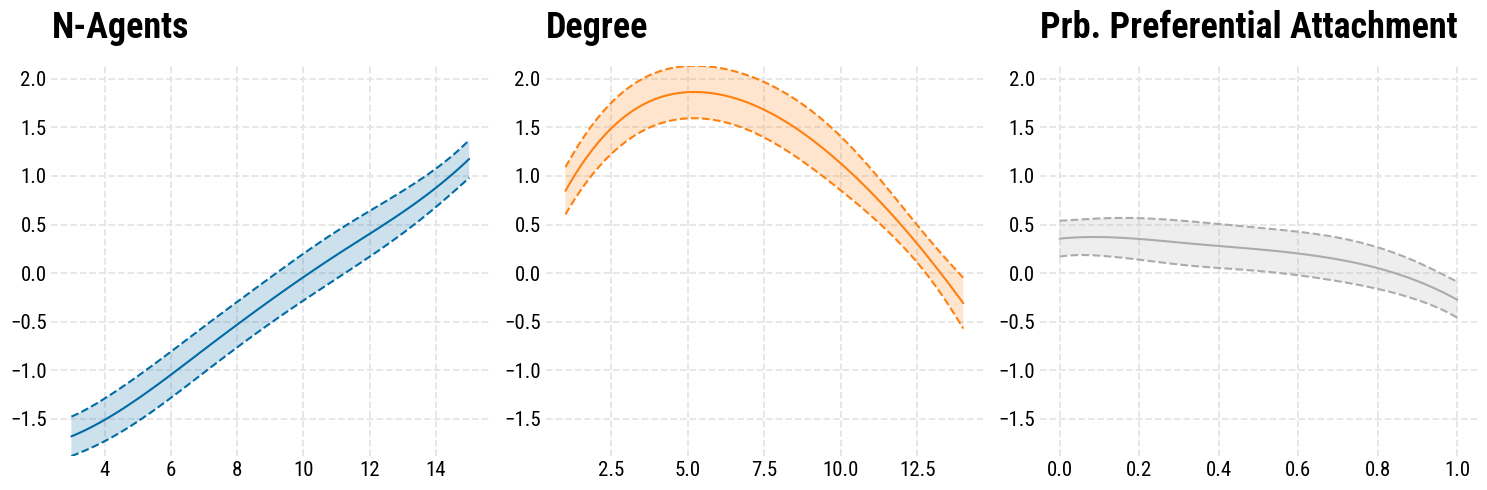

In [ ]:
import matplotlib.pyplot as plt

# Suppose `gam` is your model and `gam.terms` contains the terms used in the model.
# First, determine the number of plots (ignoring the intercept)
plot_count = sum(not term.isintercept for term in gam.terms)

# Start the figure
plt.figure(figsize=(15, 5))  # Adjust the size as needed

current_plot = 1
# Initialize a list to store y-limits
y_limits = []
labels =['N-Agents', 'Degree', 'Prb. Preferential Attachment']
# First pass: compute the y-axis limits for all plots
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    y_limits.append((min(pdep.min(), confi.min()), max(pdep.max(), confi.max())))

# Global y limits
global_y_min = min(limit[0] for limit in y_limits)
global_y_max = max(limit[1] for limit in y_limits)

# Second pass: plot with standardized y limits
current_plot = 1
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    # Set the subplot position
    plt.subplot(1, plot_count, current_plot)
    plt.plot(XX[:, term.feature], pdep,c=colors[i])
    plt.plot(XX[:, term.feature], confi, c=colors[i], ls='--')
    
    plt.fill_between(XX[:, term.feature], confi[:, 0], confi[:, 1], facecolor=colors[i], alpha=0.2, interpolate=True)

    plt.ylim(global_y_min, global_y_max)  # Set global y limits
    plt.title(labels[i])
    plt.xlabel('')  # Remove x-axis label
    plt.ylabel('')  # Remove y-axis label


    current_plot += 1  # Move to the next plot position

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


# Randomized networks

In [94]:
import random
import networkx as nx
from hybrid_networks import randomized_barabasi_albert_graph

def generate_parameters(n):
    params_list = []
    for _ in range(n):
        n_agents = random.randint(3, 100)
        n_edges_to_add = random.randint(1, np.max([int(n_agents/10),1])) #rethink
        randomization_probability = random.uniform(0, 1)
        network = randomized_barabasi_albert_graph(n_agents, 
                                                    n_edges_to_add=n_edges_to_add, 
                                                    randomization_probability=randomization_probability)
        uncertainty = 0.001
        n_experiments = 1000 #random.randint(1, 1000)
        params = {
            "n_agents": n_agents,
            "n_edges_to_add": n_edges_to_add,
            "randomization_probability": randomization_probability,
            "network": network,
            "uncertainty": uncertainty,
            "n_experiments": n_experiments
        }
        params_list.append(params)
    return params_list

# Example usage:
# Generate a list of 5 parameter dictionaries
parameter_dictionaries = generate_parameters(50)




In [95]:
parameter_dictionaries

[{'n_agents': 6,
  'n_edges_to_add': 1,
  'randomization_probability': 0.3066215272629732,
  'network': <networkx.classes.graph.Graph at 0x2f604c890>,
  'uncertainty': 0.001,
  'n_experiments': 1000},
 {'n_agents': 4,
  'n_edges_to_add': 1,
  'randomization_probability': 0.21376908591860166,
  'network': <networkx.classes.graph.Graph at 0x2f604c390>,
  'uncertainty': 0.001,
  'n_experiments': 1000},
 {'n_agents': 64,
  'n_edges_to_add': 6,
  'randomization_probability': 0.5756424007939364,
  'network': <networkx.classes.graph.Graph at 0x2b9d8fb90>,
  'uncertainty': 0.001,
  'n_experiments': 1000},
 {'n_agents': 67,
  'n_edges_to_add': 6,
  'randomization_probability': 0.8849150780526577,
  'network': <networkx.classes.graph.Graph at 0x2b9a67fd0>,
  'uncertainty': 0.001,
  'n_experiments': 1000},
 {'n_agents': 44,
  'n_edges_to_add': 3,
  'randomization_probability': 0.46759915539183294,
  'network': <networkx.classes.graph.Graph at 0x2b9d85b10>,
  'uncertainty': 0.001,
  'n_experiments

{'n_agents': 6, 'n_edges_to_add': 1, 'randomization_probability': 0.3066215272629732, 'network': <networkx.classes.graph.Graph object at 0x2f604c890>, 'uncertainty': 0.001, 'n_experiments': 1000}


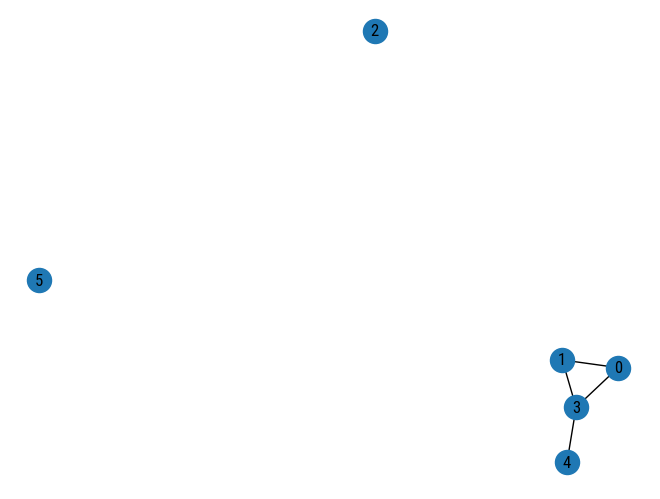

In [96]:
import networkx as nx
import matplotlib.pyplot as plt

# Get the network from the parameter dictionary
params = parameter_dictionaries[0]
print(params)
network = params['network']

# Create a graph from the network
graph = nx.Graph(network)

# Plot the graph
nx.draw(graph, with_labels=True)
plt.show()


In [97]:
parameter_dictionaries = generate_parameters(10000)  # Generate parameter dictionaries
results_df = run_simulations(parameter_dictionaries, number_of_steps=100000, show_bar=False)
display(results_df)


Running simulations: 100%|██████████| 10000/10000 [09:41<00:00, 17.18it/s]


,n_agents,n_edges_to_add,randomization_probability,uncertainty,n_experiments,true_consensus,true_consensus_alternative_stop
0,35,1,0.465802,0.001,1000,0.828571,0.828571
1,7,1,0.126811,0.001,1000,1.000000,1.000000
2,39,3,0.870653,0.001,1000,1.000000,1.000000
3,8,1,0.697600,0.001,1000,0.875000,0.875000
4,64,2,0.709067,0.001,1000,0.968750,0.968750
...,...,...,...,...,...,...,...
9995,44,4,0.453453,0.001,1000,1.000000,1.000000
9996,16,1,0.161439,0.001,1000,1.000000,1.000000
9997,67,2,0.138573,0.001,1000,1.000000,1.000000
9998,36,3,0.367534,0.001,1000,1.000000,1.000000


In [98]:

 
    # Preparing the data
X = results_df[['n_agents', 'n_edges_to_add', 'randomization_probability']]
y = results_df['true_consensus'].astype(int)  # Convert boolean to integer

# Splitting the data into training and testing sets for model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the Logistic GAM model
gam = LogisticGAM(s(0,n_splines=6) + s(1,n_splines=6) + s(2,n_splines=6) ).fit(X_train, y_train)

print(f"Model for {network_type}:")
print(f"Accuracy on training data: {gam.accuracy(X_train, y_train)}")
print(f"Accuracy on test data: {gam.accuracy(X_test, y_test)}")
print(gam.summary())

Model for complete:
Accuracy on training data: 0.8481428571428572
Accuracy on test data: 0.8496666666666667
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      9.5573
Link Function:                        LogitLink Log Likelihood:                                 -2388.4934
Number of Samples:                         7000 AIC:                                             4796.1014
                                                AICc:                                            4796.1363
                                                UBRE:                                               2.6862
                                                Scale:                                                 1.0
                                    

/var/folders/hz/4s_tpd8s47xfzz7rhhfjdbb00000gn/T/ipykernel_84390/2392922359.py:14: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


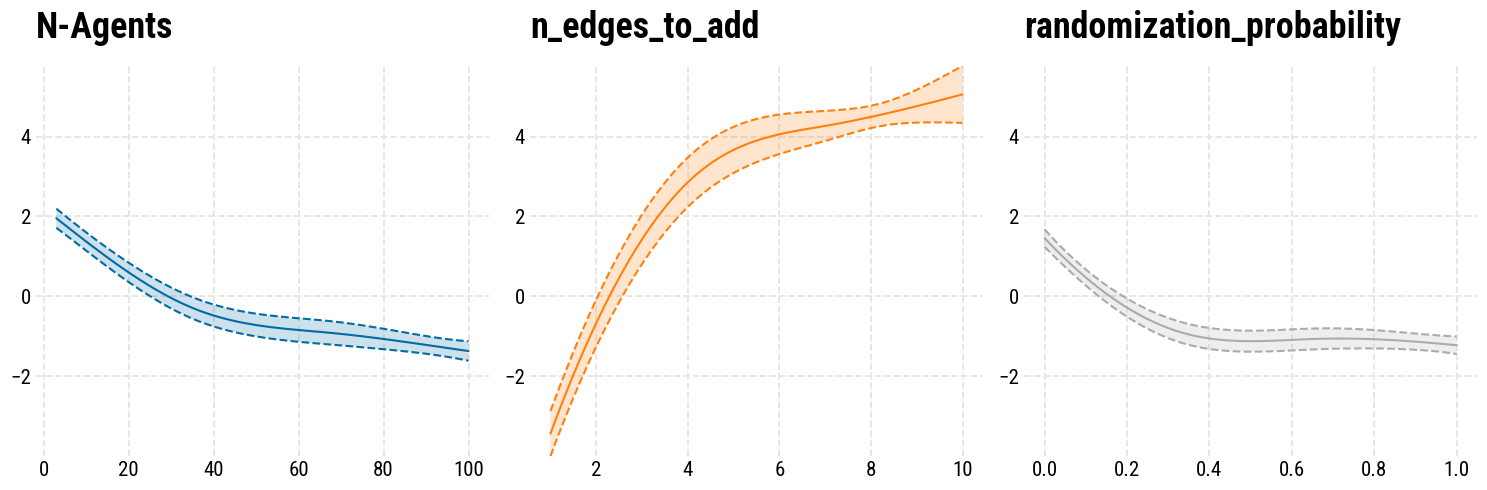

In [99]:
import matplotlib.pyplot as plt

# Suppose `gam` is your model and `gam.terms` contains the terms used in the model.
# First, determine the number of plots (ignoring the intercept)
plot_count = sum(not term.isintercept for term in gam.terms)

# Start the figure
plt.figure(figsize=(15, 5))  # Adjust the size as needed

current_plot = 1
# Initialize a list to store y-limits
y_limits = []
labels =['N-Agents', 'n_edges_to_add', 'randomization_probability']
# First pass: compute the y-axis limits for all plots
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    y_limits.append((min(pdep.min(), confi.min()), max(pdep.max(), confi.max())))

# Global y limits
global_y_min = min(limit[0] for limit in y_limits)
global_y_max = max(limit[1] for limit in y_limits)

# Second pass: plot with standardized y limits
current_plot = 1
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    # Set the subplot position
    plt.subplot(1, plot_count, current_plot)
    plt.plot(XX[:, term.feature], pdep,c=colors[i])
    plt.plot(XX[:, term.feature], confi, c=colors[i], ls='--')
    
    plt.fill_between(XX[:, term.feature], confi[:, 0], confi[:, 1], facecolor=colors[i], alpha=0.2, interpolate=True)

    plt.ylim(global_y_min, global_y_max)  # Set global y limits
    plt.title(labels[i])
    plt.xlabel('')  # Remove x-axis label
    plt.ylabel('')  # Remove y-axis label


    current_plot += 1  # Move to the next plot position

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()
